## _Модель мультифакторної лінійної регресіїї_

In [8]:
%matplotlib inline
import numpy as np
import pandas as pd
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale
import seaborn as sb
sb.set_style('whitegrid')
from collections import Counter
from sklearn.metrics import mean_absolute_error, mean_squared_error

_Вигружаємо данны до датасету_

In [9]:
df = pd.read_csv('petrol_consumption.csv')
df.head(10)

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410
5,10.0,5342,1333,0.571,457
6,8.0,5319,11868,0.451,344
7,8.0,5126,2138,0.553,467
8,8.0,4447,8577,0.529,464
9,7.0,4512,8507,0.552,498


_Переіменовуємо колинки, для кращого розуміння_

In [10]:
df.columns = ['Податок на бензин','Середній дохід','Протяжність автобамів','Відсоток водійських прав','Розхід палива']
df.head(10)

,Податок на бензин,Середній дохід,Протяжність автобамів,Відсоток водійських прав,Розхід палива
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410
5,10.0,5342,1333,0.571,457
6,8.0,5319,11868,0.451,344
7,8.0,5126,2138,0.553,467
8,8.0,4447,8577,0.529,464
9,7.0,4512,8507,0.552,498


_Будуємо ддіаграми розсіювання для даних датасету, для знаходження візуальних  задежностей_

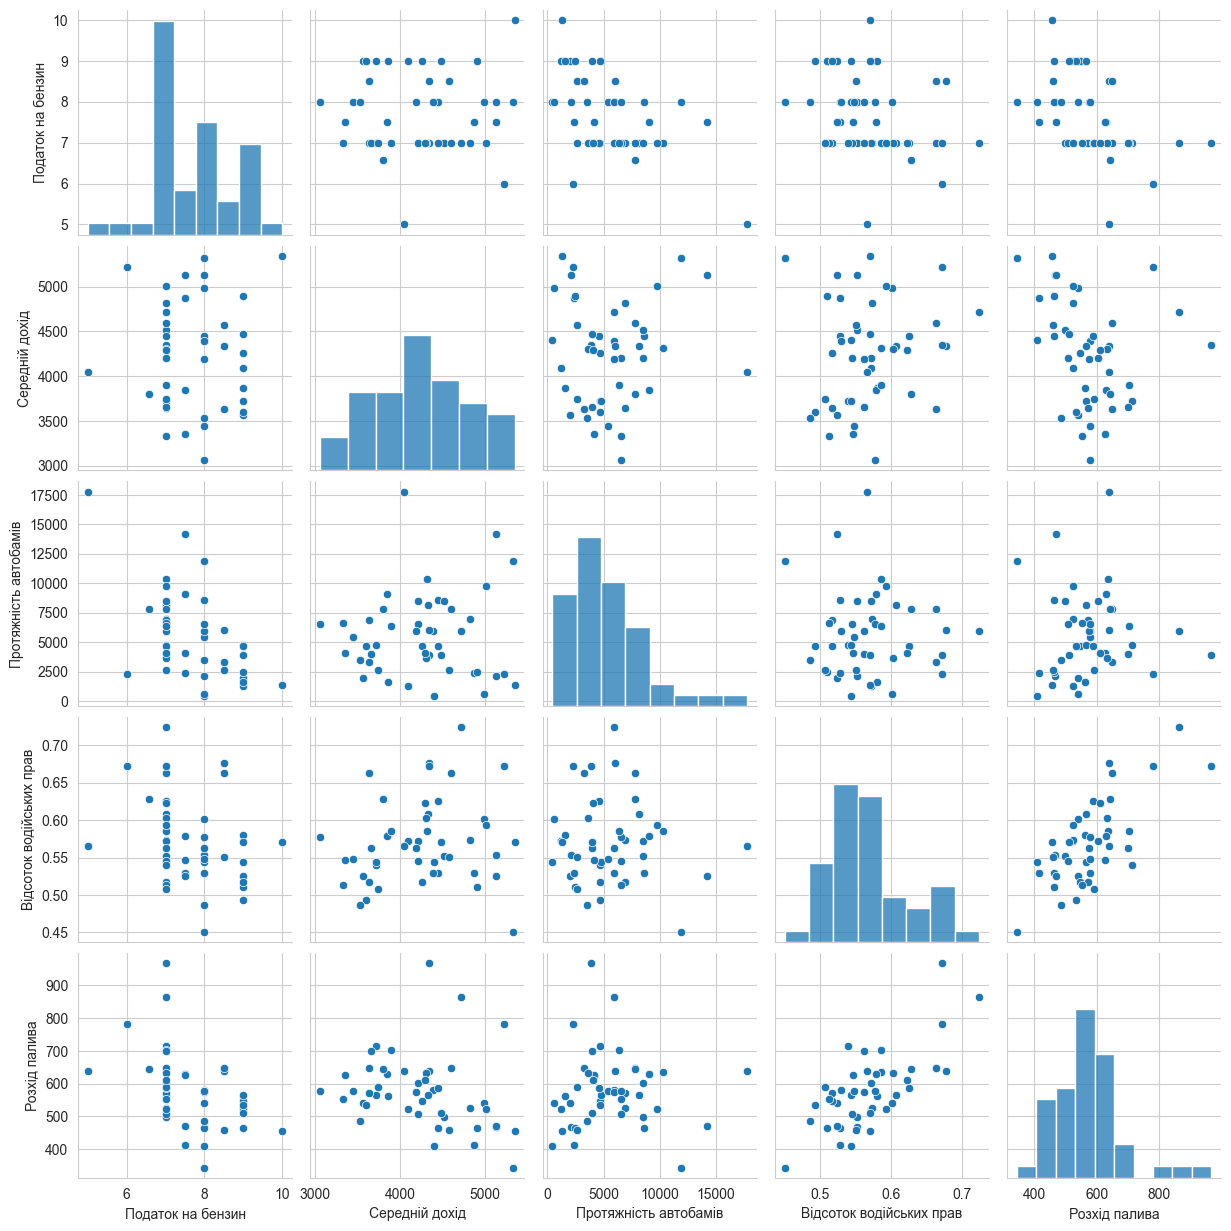

In [12]:
sb.pairplot(df)

_Будуємо матрицю корелятивних зв'язків між змінними , та виводимо на heatmap_

In [13]:
df_corr = df.corr()
df_corr

,Податок на бензин,Середній дохід,Протяжність автобамів,Відсоток водійських прав,Розхід палива
Податок на бензин,1.000000,0.012665,-0.522130,-0.288037,-0.451280
Середній дохід,0.012665,1.000000,0.050163,0.157070,-0.244862
Протяжність автобамів,-0.522130,0.050163,1.000000,-0.064129,0.019042
Відсоток водійських прав,-0.288037,0.157070,-0.064129,1.000000,0.698965
Розхід палива,-0.451280,-0.244862,0.019042,0.698965,1.000000


<Axes: >

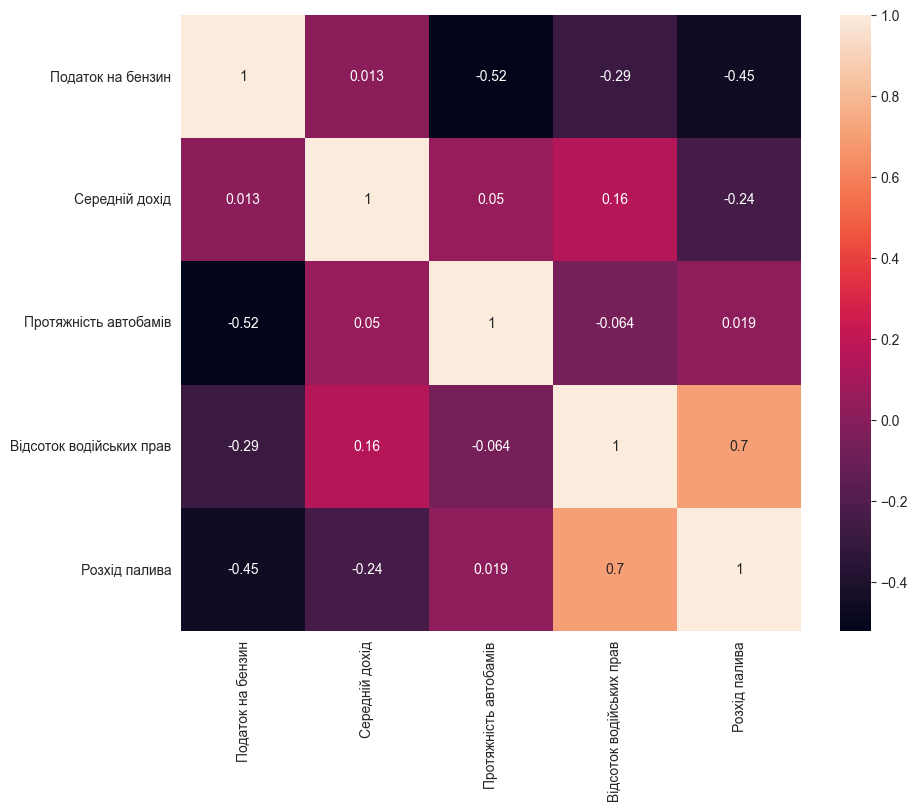

In [15]:
sb.heatmap(df_corr,annot=True)

__На основі цих данних можно зробити висновок, що найбільші корелятивні зв'язки існують між предикторами та  шукомою величиною у (-0.45,-0.24,0.7) відповідно, що є добрим показником.__

___Також є зв'язок між предикторами  "Протяжність автобамів" та "Податок на бензин" (-0.52) . Згідно логіки мали би виключити з датасету серію "Протяжність автобамів",  але емпіричним шляхом виявив , що включення данної серії до навчання моделі, дає кращі показник детермінації.___ 

In [48]:
data = df[['Податок на бензин','Середній дохід','Відсоток водійських прав','Протяжність автобамів']].values
target  = df[['Розхід палива']].values
data_names = ['Податок на бензин','Середній дохід','Відсоток водійських прав','Протяжність автобамів']

X, y = scale(data), target

_Також робимо перевірку на наявність пустих значень_

In [49]:
missing = X == np.NaN
X[missing==True]

array([], dtype=float64)

_Будуємо та навчаємо модель_

In [50]:
model_mlreg = LinearRegression()

In [51]:
model_mlreg.fit(X,y)

LinearRegression()

_Отримуємо показники точки перетину з осю у, та коефіцієнта нахилу кожної функції_

In [52]:
print(f'beta0 : {model_mlreg.intercept_}\n beta : {model_mlreg.coef_}')

beta0 : [576.77083333]
 beta : [[-32.7310515  -37.79691223  73.3569154   -8.3813148 ]]


_Отримуємо коефіцієнт детермінації_

In [53]:
model_mlreg.score(X,y)

0.6786867115698209

_Робимо предикцію шукомої велечини на основі навченої моделі, та будуємо графік залежностей між предикторарими та прогностичними показниками у._

In [55]:
y_pred = model_mlreg.predict(X)

In [58]:
y_pred[:10]

array([[523.23372749],
       [553.11530293],
       [578.10744578],
       [493.35625176],
       [532.02892629],
       [433.55141589],
       [318.73259324],
       [491.50595563],
       [489.02463498],
       [550.39466272]])

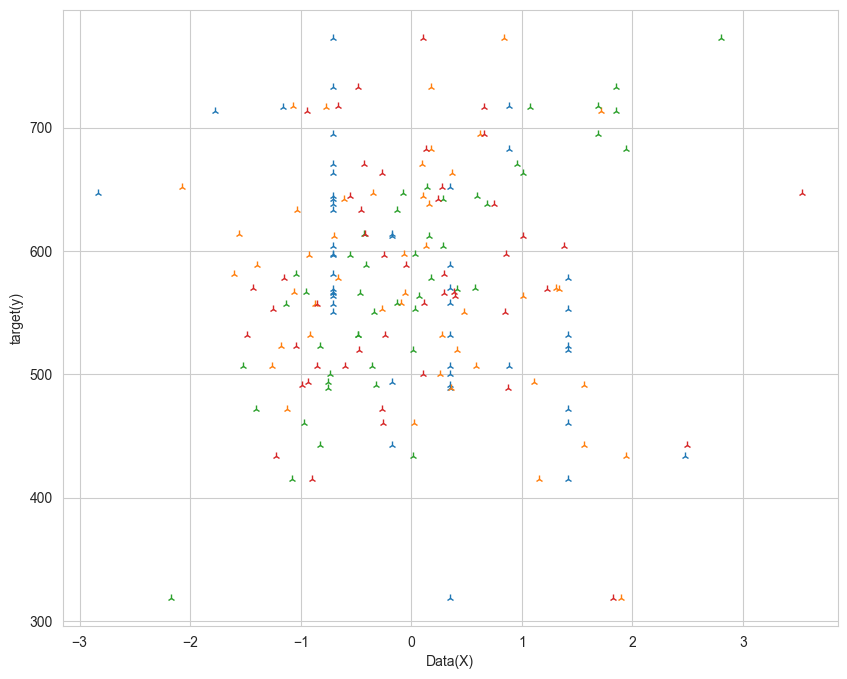

In [64]:
plt.plot(X, y_pred, '2')
plt.xlabel('Data(X)')
plt.ylabel('target(y)')
plt.show()

_Отримуємо коефіцієнт детермінації X від  y_pred._

In [65]:
model_mlreg.score(X, y_pred)

1.0

_Додатково розраховуємо показники mae,mse,rmse_

In [66]:
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse =np.sqrt(mse)

In [68]:
print(f'mean_absolute_error : {mae: 2f}')
print(f'mean_squared_error : {mse: 2f}')
print(f'Root mean_squared_error : {rmse: 2f}')

mean_absolute_error :  48.777481
mean__error :  3938.541005
Root mean_squared_error :  62.757796


## Висновок

Ми отримали середньої якості модель, оскільки вона дасть правильну прогностику тільки в 68% випадків. Для того щоб покращити якість модель, потрібно підбрати більш правильні вхідні данні або використовувати інші методи навчання моделі.